<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/MallCustomer_Kmeans20Jan2024ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Mall_Customers.csv',na_values='?')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

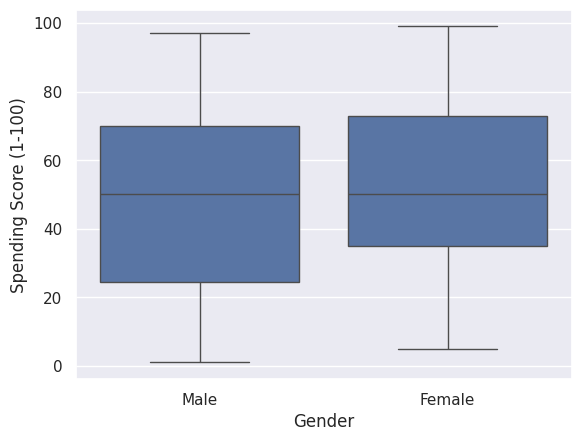

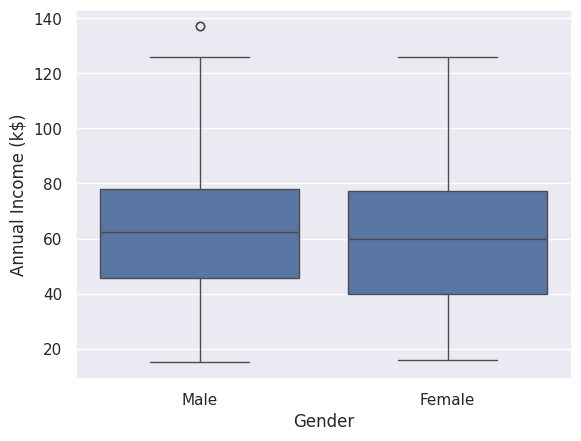

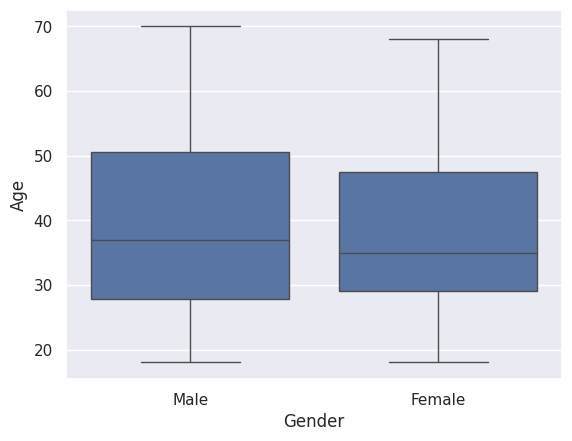

In [ ]:
sns.boxplot(x='Gender',y='Spending Score (1-100)', data =df )
plt.show()

sns.boxplot(x='Gender',y='Annual Income (k$)', data =df )
plt.show()

sns.boxplot(x='Gender',y='Age', data =df )
plt.show()

In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
df.drop(columns='CustomerID',inplace= True)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
#Data Preprocessing
df1= df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].values

df1[:3]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6]], dtype=object)

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_gen = LabelEncoder()
le_gen.fit(['Female','Male'])
df1[:,0] = le_gen.transform(df1[:,0])

df1[:3]

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler

df_std = StandardScaler().fit_transform(df1)

df_std[:3]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298]])

In [ ]:
df_std =pd.DataFrame(data=df_std, columns =df.columns)

df_std.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [ ]:
df_std.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


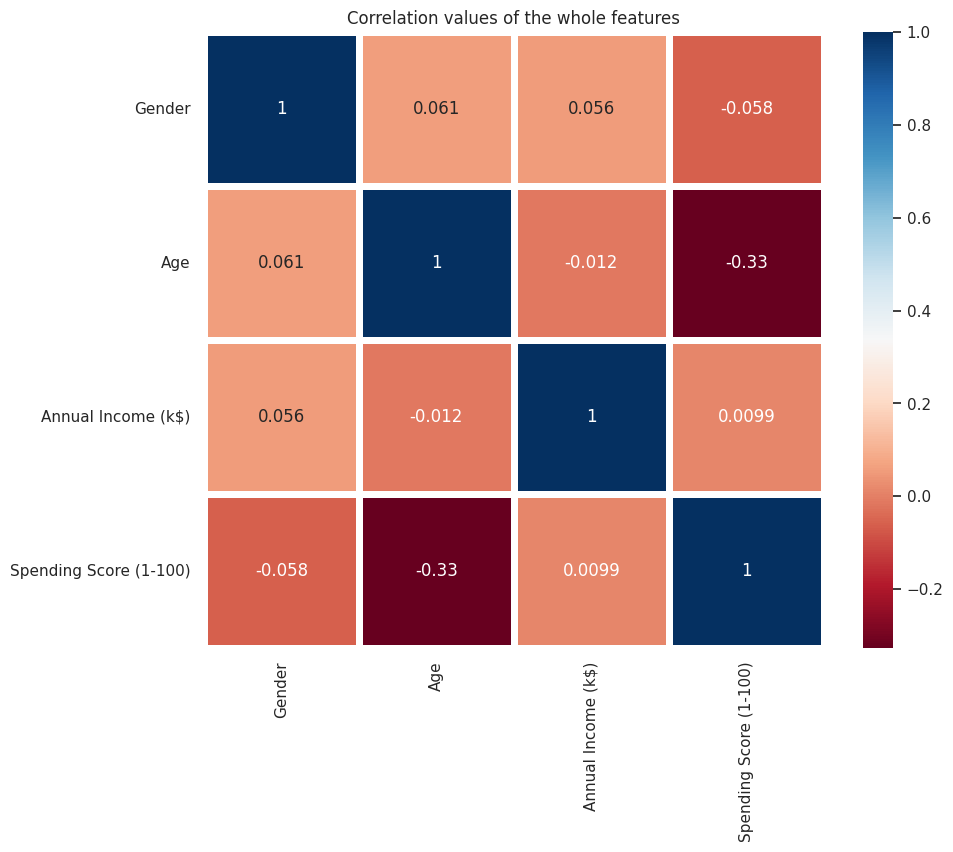

In [ ]:
# using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df_std.corr(), annot=True, cmap='RdBu', linewidth= 5)
plt.title('Correlation values of the whole features',fontsize=12)
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

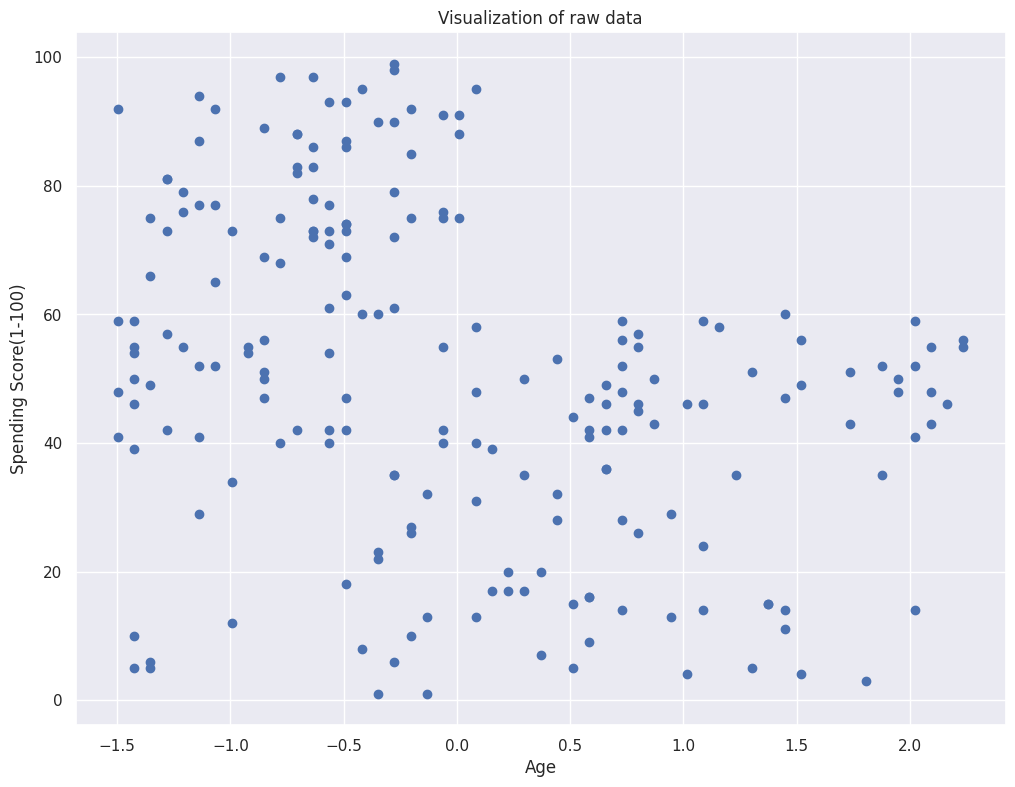

In [ ]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set.
plt.figure(figsize = (12, 9))
plt.scatter(df_std.iloc[:, 1], df.iloc[:, 3]) #index of age and spending scores
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.title('Visualization of raw data')


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

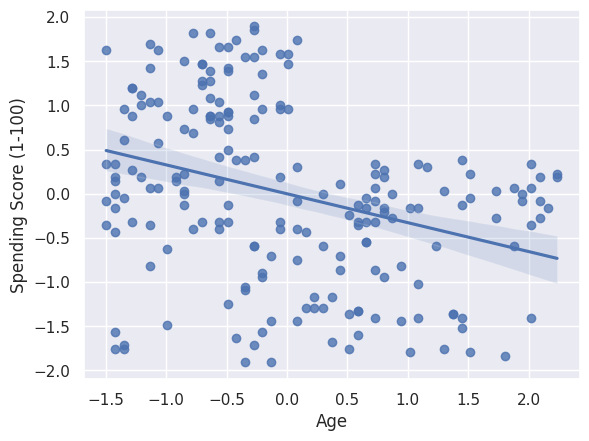

In [ ]:
sns.regplot(x='Age',y ='Spending Score (1-100)', data=df_std, scatter_kws=None)


**K Mean Clustering**

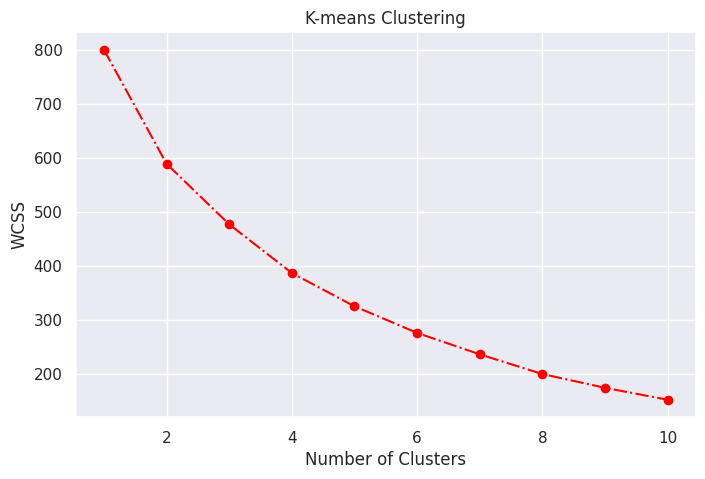

In [ ]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus.
# And we set a random state for reproducibility.
wcss = [] #Within-Cluster Sum of Square
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)



# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters.
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (8,5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters =4, n_init=4, random_state= 42)

kmeans.fit(df_std)

KMeans(n_clusters=4, n_init=4, random_state=42)

In [ ]:
#under this new variable add in columns
df_segm_kmeans = df_std.copy()

df_segm_kmeans.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [ ]:
df_segm_kmeans['Segmented_KMeans']=
df_segm_kmeans.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Segmented_KMeans
0,1.128152,-1.424569,-1.738999,-0.434801,3
1,1.128152,-1.281035,-1.738999,1.195704,3
2,-0.886405,-1.352802,-1.700830,-1.715913,2
3,-0.886405,-1.137502,-1.700830,1.040418,1
4,-0.886405,-0.563369,-1.662660,-0.395980,1
5,-0.886405,-1.209269,-1.662660,1.001596,1
6,-0.886405,-0.276302,-1.624491,-1.715913,2
7,-0.886405,-1.137502,-1.624491,1.700384,1
8,1.128152,1.804932,-1.586321,-1.832378,0
9,-0.886405,-0.635135,-1.586321,0.846310,1


In [ ]:
#EDA

df_segm_kmeans_groupby = df_segm_kmeans.groupby(['Segmented_KMeans']).mean()

df_segm_kmeans_groupby

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Segmented_KMeans,,,,
0,1.128152,0.759830,0.070868,-0.814929
1,-0.886405,-0.747192,-0.034098,0.678764
2,-0.886405,0.664494,-0.066484,-0.598558
3,1.128152,-0.760727,0.054964,0.833693


In [ ]:
df_segm_kmeans['Label'] = df_segm_kmeans

In [ ]:
# Add segment to the label
df['Labels']= df


,Gender,Age,Annual Income (k$),Spending Score (1-100),Segmented_KMeans,Labels
0,1.128152,-1.424569,-1.738999,-0.434801,3,High spending
1,1.128152,-1.281035,-1.738999,1.195704,3,High spending
2,-0.886405,-1.352802,-1.700830,-1.715913,2,Average spending
3,-0.886405,-1.137502,-1.700830,1.040418,1,Low spending
4,-0.886405,-0.563369,-1.662660,-0.395980,1,Low spending
5,-0.886405,-1.209269,-1.662660,1.001596,1,Low spending
6,-0.886405,-0.276302,-1.624491,-1.715913,2,Average spending
7,-0.886405,-1.137502,-1.624491,1.700384,1,Low spending
8,1.128152,1.804932,-1.586321,-1.832378,0,Very low spending
9,-0.886405,-0.635135,-1.586321,0.846310,1,Low spending


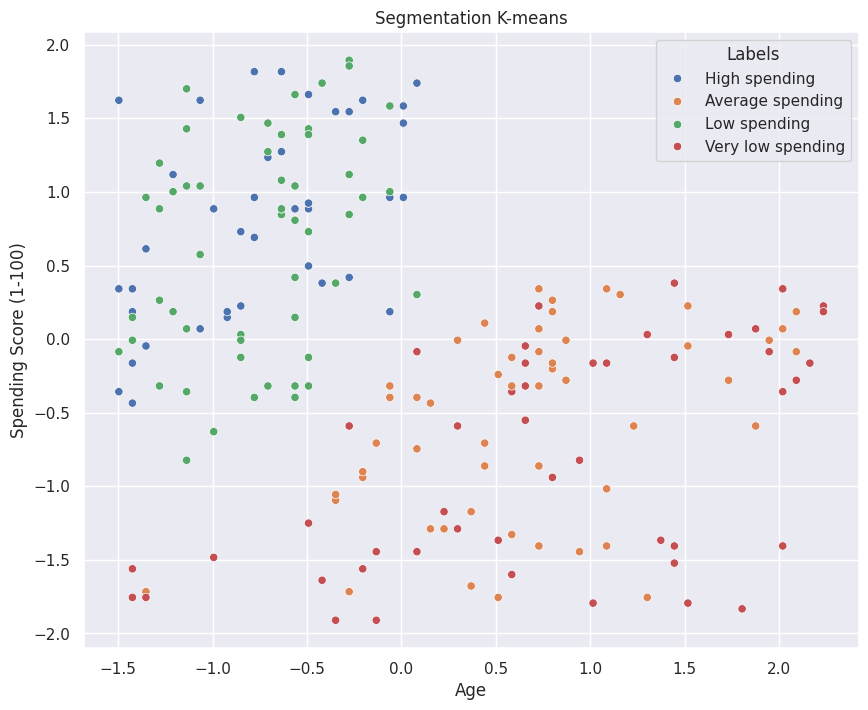

In [ ]:
# We plot the results from the K-means algorithm.
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Spending Score (1-100)']
plt.figure(figsize = (10, 8))
#sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
sns.scatterplot(data=df_segm_kmeans, x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'])
plt.title('Segmentation K-means')
plt.show()